# Clonando Dataset

In [1]:
! rm -rf tools_classifier
! git clone https://github.com/zRafaF/tools_classifier

Cloning into 'tools_classifier'...
remote: Enumerating objects: 471, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 471 (delta 0), reused 124 (delta 0), pack-reused 343 (from 1)
Receiving objects: 100% (471/471), 150.59 MiB | 10.50 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Updating files: 100% (546/546), done.


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [4]:
DATA_SET_PATH = './tools_classifier/data_set/c_r_a_g_png'
NORMALIZED_DATA_SET_PATH = './tools_classifier/data_set/c_r_a_g_n_png'

In [92]:
def calculate_rgb_histograms(image):
    # CV2 trabalha com o formato BGR
    blue_color = cv2.calcHist([image], [0], None, [256], [0, 256])
    green_color = cv2.calcHist([image], [1], None, [256], [0, 256])
    red_color = cv2.calcHist([image], [2], None, [256], [0, 256])

    # Devolve valores como RGB
    return red_color, green_color, blue_color


def plot_histograms(hists, labels):
    num_hists = len(hists)
    plt.figure(figsize=(5 * num_hists, 5))

    for idx, histogram in enumerate(hists):
        r, g, b = histogram
        plt.subplot(1, num_hists, idx + 1)
        plt.title(labels[idx])
        plt.plot(r, color='r', label='Red')
        plt.plot(g, color='g', label='Green')
        plt.plot(b, color='b', label='Blue')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Exemplo do dataset padrão e do normalizado


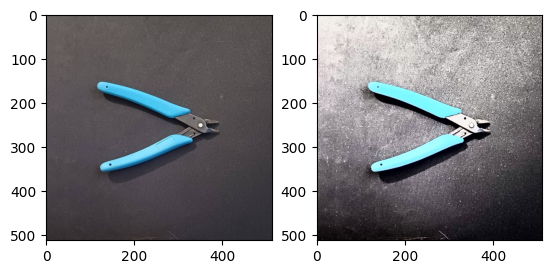

In [18]:
test_img = io.imread(os.path.join(DATA_SET_PATH, "cutting_pliers", "2-01-V1-B.png"))
equalized_test_img = io.imread(os.path.join(NORMALIZED_DATA_SET_PATH, "cutting_pliers", "2-01-V1-B.png"))

plt.subplot(1, 2, 1)
plt.imshow(test_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(equalized_test_img, cmap='gray')

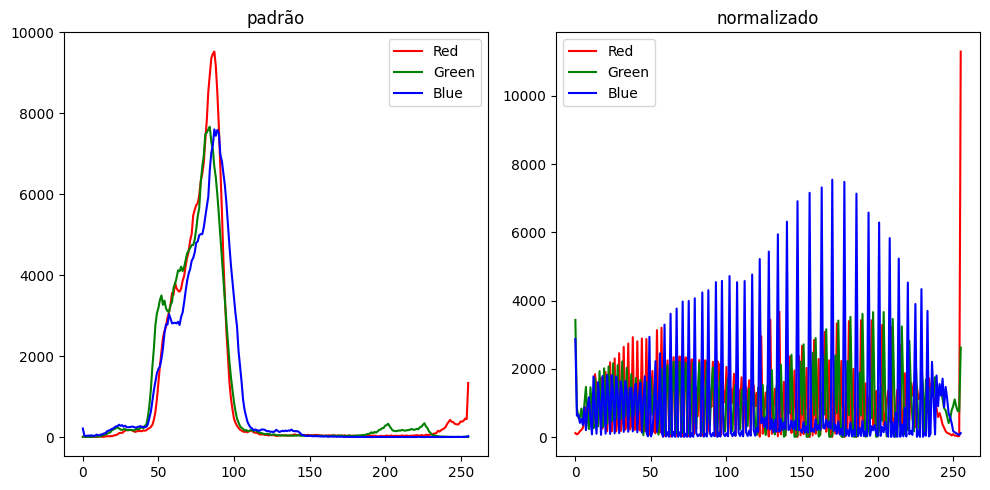

In [88]:
plot_histograms([calculate_rgb_histograms(test_img),calculate_rgb_histograms(equalized_test_img)], ["padrão", "normalizado"])

## Iterando sobre cada classe

In [25]:
def images_loader(data_set_path):
  classes_dict = []
  for dir in os.listdir(data_set_path):
      images_dict = []
      data_set_dir = os.path.join(data_set_path, dir)
      for filename in os.listdir(data_set_dir):
        if filename.endswith('.png'):
            img_path = os.path.join(data_set_dir, filename)
            image = io.imread(img_path)
            splitted = filename.split(".")[0].split("-")

            current_dict = {
                "classid": splitted[0],
                "img_sequence": splitted[1],
                "V1|V2": splitted[2],
                "B|W": splitted[3],
                "filename": filename,
                "image": image
            }

            images_dict.append(current_dict)
      classes_dict.append({
          "class": dir,
          "images": images_dict
      })
  return classes_dict


## Operando sobre imagens em classe

In [69]:
def class_operation(classes_dict):
  classes_hist_dict = []
  for class_dict in classes_dict:
    average_class_histogram_r = []
    average_class_histogram_g = []
    average_class_histogram_b = []
    for image_dict in class_dict["images"]:
      r,g,b = calculate_rgb_histograms(image_dict["image"])
      average_class_histogram_r.extend(r)
      average_class_histogram_g.extend(g)
      average_class_histogram_b.extend(b)
    classes_hist_dict.append({
        "class": class_dict["class"],
        "hist_rgb": (r,g,b)
        })
  return classes_hist_dict


## Calculando histogramas

In [70]:
default_hists = class_operation(images_loader(DATA_SET_PATH))
hormalized_hists = class_operation(images_loader(NORMALIZED_DATA_SET_PATH))


## Plotando histograma médio das classes

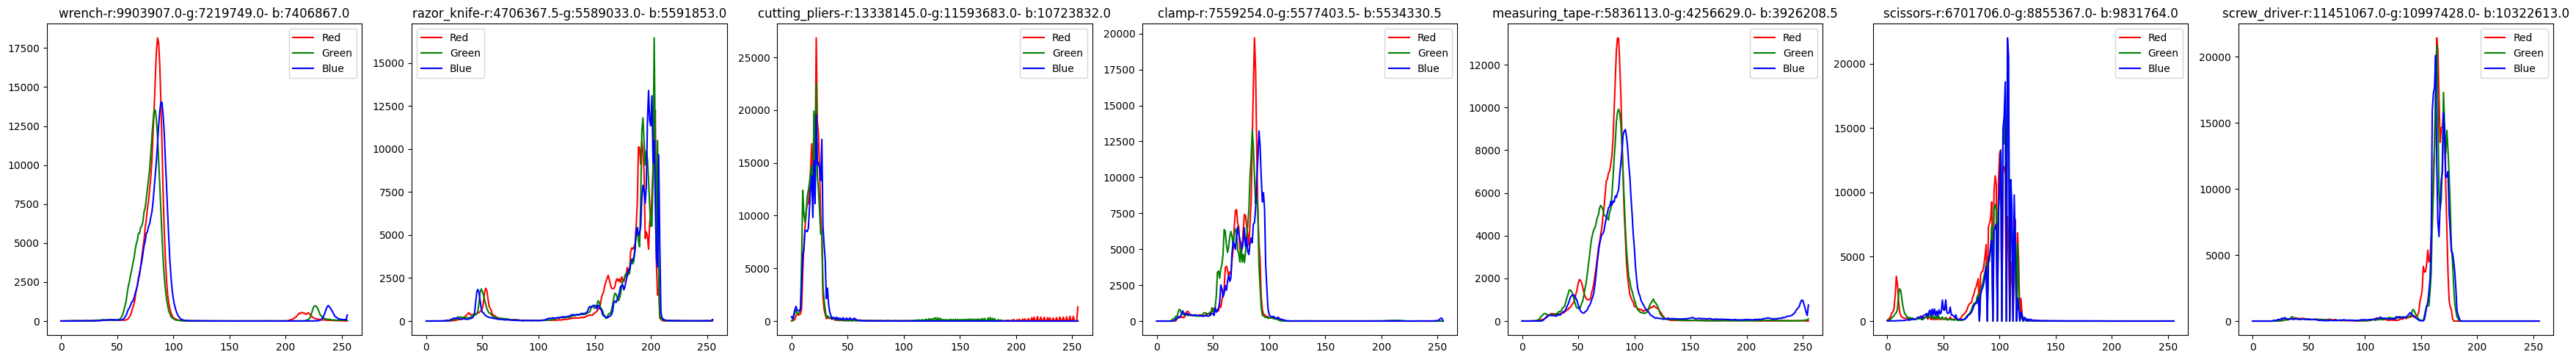

In [89]:
hists = []
labels = []
for hist in default_hists:
  hists.append(hist["hist_rgb"])
  r_variance = np.var(hist["hist_rgb"][0])
  g_variance = np.var(hist["hist_rgb"][1])
  b_variance = np.var(hist["hist_rgb"][2])
  labels.append(hist["class"] + "-r:" + str(r_variance) + "-g:" + str(g_variance) + "- b:" + str(b_variance))
plot_histograms(hists, labels)

# Plotando histogramas normalizados

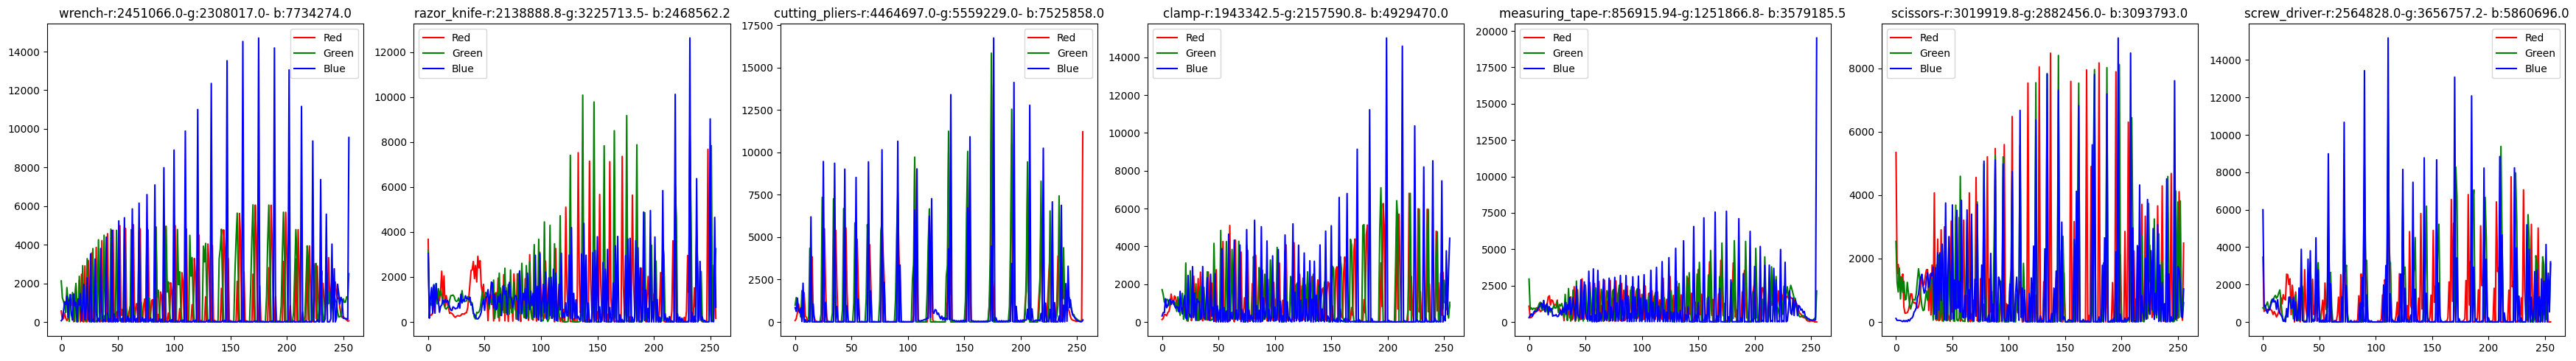

In [90]:
hists = []
labels = []
for hist in hormalized_hists:
  hists.append(hist["hist_rgb"])
  r_variance = np.var(hist["hist_rgb"][0])
  g_variance = np.var(hist["hist_rgb"][1])
  b_variance = np.var(hist["hist_rgb"][2])
  labels.append(hist["class"] + "-r:" + str(r_variance) + "-g:" + str(g_variance) + "- b:" + str(b_variance))
plot_histograms(hists, labels)